In [37]:
import re

from pathlib import Path

import pipeline_utils.arc_gis as arc_gis

List available ONS Geography layers

In [2]:
services = arc_gis.list_services()

Find the feature server of the for the relevant geo data. We're using the BGC, as this provides a good tradeoff between accuracy and file size.

In [71]:
feature_server = next((
    s['url'] for s in services['services']
    if re.match(r'Local_Authority_Districts_.*2024.*BGC', s['name']) and s['type'] == 'FeatureServer'))

Download geo layer

In [72]:
geo = arc_gis.load_geojson(feature_server)

Filter by just the North East LADs

In [73]:
geo = geo[
    geo.LAD24CD.isin([
        'E06000047',
        'E06000057', 
        'E08000021',
        'E08000022',
        'E08000023',
        'E08000024',
        'E08000037'
    ])
]

Plot, to check we've got the right ones!

<Axes: >

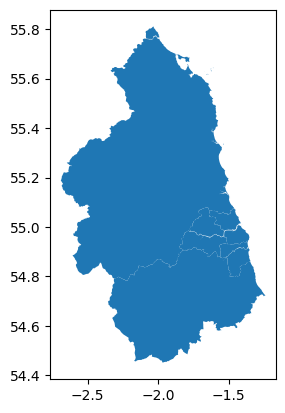

In [74]:
geo.plot()

Save the dataset

In [75]:
ROOT = Path('..')

In [76]:
geo.set_crs(None, allow_override=True).to_file(ROOT / 'src/_data/geojson/lad/all.geojson')

/home/giles/.local/share/virtualenvs/northumbria-culture-connect-dQ7VTDtt/lib/python3.10/site-packages/pyogrio/raw.py:698: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  warnings.warn(


In [77]:
for cd in geo.LAD24CD.values:
    geo[geo.LAD24CD == cd].set_crs(None, allow_override=True).to_file(ROOT / f'src/_data/geojson/lad/{cd}.geojson')

/home/giles/.local/share/virtualenvs/northumbria-culture-connect-dQ7VTDtt/lib/python3.10/site-packages/pyogrio/raw.py:698: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  warnings.warn(
/home/giles/.local/share/virtualenvs/northumbria-culture-connect-dQ7VTDtt/lib/python3.10/site-packages/pyogrio/raw.py:698: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  warnings.warn(
/home/giles/.local/share/virtualenvs/northumbria-culture-connect-dQ7VTDtt/lib/python3.10/site-packages/pyogrio/raw.py:698: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  warnings.warn(
/home/giles/.local/share/virtualenvs/northumbria-culture-connect-dQ7VTDtt/lib/python3.10/site-packages/pyogrio/raw.py:698: UserWarning: 'crs' was not prov